https://scikit-learn.org/0.19/auto_examples/ensemble/plot_feature_transformation.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import make_pipeline

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from scipy.stats import randint
import multiprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import scikitplot as skplt

In [2]:
#carga los datos
tabla_final = pd.read_csv('correlaciones/tabla_entrega_final.csv', sep = ",")



## Definimos una tabla con los id de clientes
## Para luego poeder funtarla con las prob ##
## Si se queda se considera como parametro ##
tabla_con_id_cliente = tabla_final

tabla_final = tabla_final.drop('ID_CLIENTE', axis=1)
#visualizamos los datos
tabla_final

,ANTIGUEDAD,FLAG_ACTIVI,ID_ESTADO,ACEPTADO,CT_CTE,DEBITO_DIR,Suma,RENTA,EDAD,ID_GENERO,ID_REGION_RESIDE
0,6.0,1.0,0.0,0.0,1,0,1,87218.10,36.0,1.0,0.0
1,35.0,0.0,1.0,0.0,1,0,1,122179.11,23.0,0.0,0.0
2,35.0,0.0,1.0,0.0,0,0,1,119775.54,23.0,1.0,0.0
3,35.0,0.0,1.0,0.0,1,0,1,22220.04,24.0,1.0,0.0
4,35.0,0.0,1.0,0.0,1,0,1,295590.36,24.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
602519,62.0,0.0,1.0,0.0,0,0,0,97397.16,41.0,1.0,1.0
602520,7.0,0.0,1.0,0.0,0,0,0,168445.62,34.0,0.0,0.0
602521,6.0,0.0,1.0,0.0,0,0,0,53689.02,24.0,1.0,1.0
602522,229.0,0.0,1.0,0.0,0,0,0,64404.21,61.0,0.0,0.0


In [3]:
# Split the data into features (X) and target (y)
X = tabla_final.drop('ACEPTADO', axis=1)
y = tabla_final['ACEPTADO']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.2)

In [4]:
# Se instancia el Gradient Boosting Classifier

grd = GradientBoostingClassifier(learning_rate=0.051306473451549844, max_depth=10, min_impurity_decrease=0.4789240753776005,
                           min_samples_leaf=15, min_samples_split=16, n_estimators=188, random_state=22)
grd.fit(X_train, y_train)

y_pred_grd = grd.predict_proba(X_test)
y_pred_grd

array([[0.99776216, 0.00223784],
       [0.99414385, 0.00585615],
       [0.99390476, 0.00609524],
       ...,
       [0.96491611, 0.03508389],
       [0.99416192, 0.00583808],
       [0.99776216, 0.00223784]])

In [5]:
# Se instancia el Random Forest

rf = RandomForestClassifier(max_depth = 5, n_estimators = 127, min_samples_split= 13, min_samples_leaf=9,
                             min_impurity_decrease=0.182166, class_weight='balanced', random_state=22)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)
y_pred_rf

array([[0.78802932, 0.21197068],
       [0.49773876, 0.50226124],
       [0.49773876, 0.50226124],
       ...,
       [0.49773876, 0.50226124],
       [0.49773876, 0.50226124],
       [0.78802932, 0.21197068]])

In [6]:
# Se intancia la Regresión Logistica

lr = LogisticRegression(random_state = 0, solver = "newton-cg")

lr.fit(X_train,y_train)

y_pred_lr = lr.predict_proba(X_test)
y_pred_lr

c:\Users\JuanAndres\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\JuanAndres\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\JuanAndres\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


array([[0.99568779, 0.00431221],
       [0.95873298, 0.04126702],
       [0.95786634, 0.04213366],
       ...,
       [0.95978578, 0.04021422],
       [0.97115077, 0.02884923],
       [0.99694056, 0.00305944]])

In [23]:
predict_logit = lr.predict(X_test)
aceptados_logit = predict_logit.sum()
aceptados_logit/len(predict_logit)


0.04657068171445168

In [25]:
aceptados_logit

5612.0

In [26]:
len(predict_logit)

120505

In [8]:
predicciones = lr.predict(X_test)
for i in range (0,len(predicciones)):
    if predicciones[i] < 0.5:
        predicciones[i] = 0
    else:
        predicciones[i] = 1
predicciones

array([0., 0., 0., ..., 0., 0., 0.])

In [9]:
# Datos Logistic Regression
accuracy_lr = accuracy_score(y_test, predicciones)
precision_lr = precision_score(y_test, predicciones)
recall_lr = recall_score(y_test, predicciones)

print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)

Accuracy: 0.9429816190199577
Precision: 0.6797326589595376
Recall: 0.4246699018169507


In [10]:
# ROC Curve
#Gradient Boosting Classifier
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd[:, 1])

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf[:, 1])

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr[:, 1])

AUC Gradient Boosting Classifier: 0.9488968056812662
AUC Random Forest Classifier: 0.918007653755516
AUC Logistic Regression: 0.9443689036796071


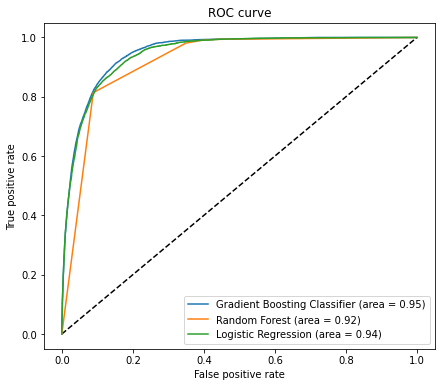

In [11]:
auc_grd = roc_auc_score(y_test, y_pred_grd[:, 1])
print("AUC Gradient Boosting Classifier: " + str(auc_grd))
auc_rf = roc_auc_score(y_test, y_pred_rf[:, 1])
print("AUC Random Forest Classifier: " + str(auc_rf))
auc_lr = roc_auc_score(y_test, y_pred_lr[:, 1])
print("AUC Logistic Regression: " + str(auc_lr))

plt.figure(figsize=(7, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_grd, tpr_grd, label='Gradient Boosting Classifier (area = %0.2f)' % auc_grd)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % auc_rf)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % auc_lr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

<Figure size 504x504 with 0 Axes>

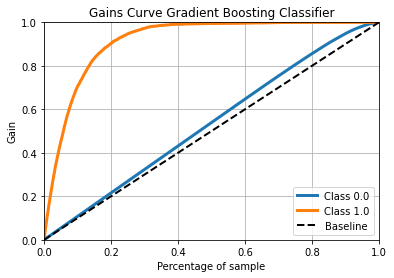

In [12]:
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, y_pred_grd)
plt.title('Gains Curve Gradient Boosting Classifier')
plt.show()

<Figure size 504x504 with 0 Axes>

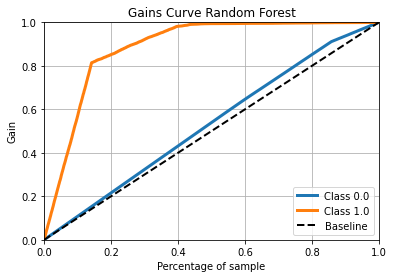

In [13]:
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, y_pred_rf)
plt.title('Gains Curve Random Forest')
plt.show()

<Figure size 504x504 with 0 Axes>

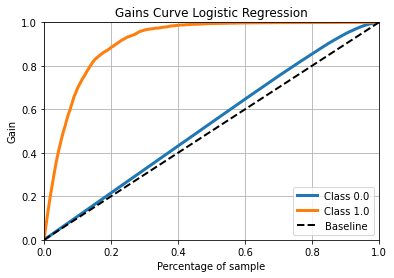

In [14]:
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, y_pred_lr)
plt.title('Gains Curve Logistic Regression')
plt.show()

AP Gradient Boosting Classifier: 0.6157103503058123
AP Random Forest Classifier: 0.37669841614094346


AP Logistic Regression: 0.604368670374732


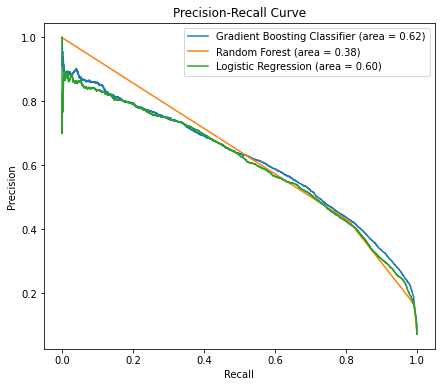

In [25]:
from sklearn.metrics import precision_recall_curve, average_precision_score

ap_grd = average_precision_score(y_test, y_pred_grd[:, 1])
print("AP Gradient Boosting Classifier: " + str(ap_grd))
ap_rf = average_precision_score(y_test, y_pred_rf[:, 1])
print("AP Random Forest Classifier: " + str(ap_rf))
ap_lr = average_precision_score(y_test, y_pred_lr[:, 1])
print("AP Logistic Regression: " + str(ap_lr))


#calculate precision and recall
precision_grd, recall_grd, thresholds_grd = precision_recall_curve(y_test, y_pred_grd[:, 1])
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_rf[:, 1])
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_pred_lr[:, 1])

#create precision recall curve
plt.figure(figsize=(7, 6))
plt.plot(recall_grd, precision_grd, label= 'Gradient Boosting Classifier (area = %0.2f)' % ap_grd)
plt.plot(recall_rf, precision_rf, label='Random Forest (area = %0.2f)' % ap_rf)
plt.plot(recall_lr, precision_lr, label='Logistic Regression (area = %0.2f)' % ap_lr)

#add axis labels to plot
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')

#display plot
plt.legend(loc='best')
plt.show()

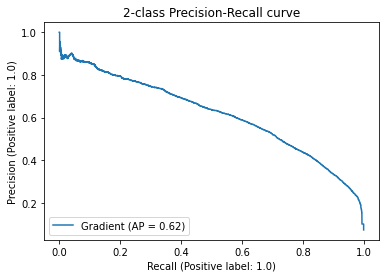

In [19]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    grd, X_test, y_test, name="Gradient"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


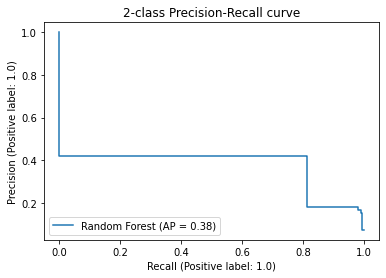

In [20]:
display = PrecisionRecallDisplay.from_estimator(
    rf, X_test, y_test, name="Random Forest"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


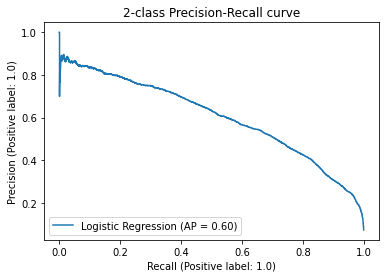

In [21]:
display = PrecisionRecallDisplay.from_estimator(
    lr, X_test, y_test, name="Logistic Regression"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


In [58]:
X_train = X_train.rename(columns={"Suma": "CANTIDAD_PRODUCTOS"})

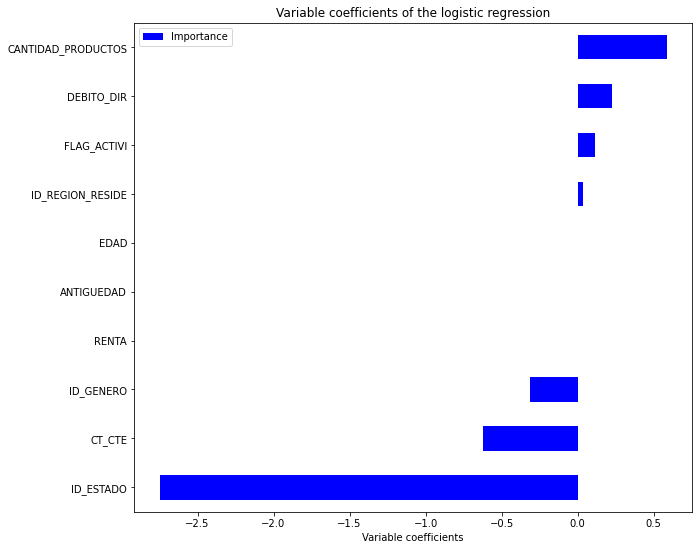

In [59]:
coefs_logit = pd.DataFrame(lr.coef_.reshape((10, 1)), 
                         index = X_train.columns.tolist(), columns = ['Importance'])
coefs = coefs_logit.sort_values(by='Importance', ascending=True)
coefs.plot(kind='barh', figsize=(10,9), color = 'blue')
plt.xlabel('Variable coefficients')
plt.title('Variable coefficients of the logistic regression')
plt.show()

<AxesSubplot:>

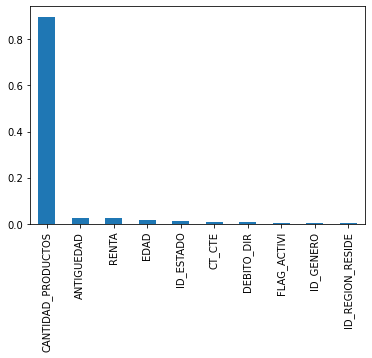

In [64]:
feature_importances = pd.Series(grd.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

<AxesSubplot:>

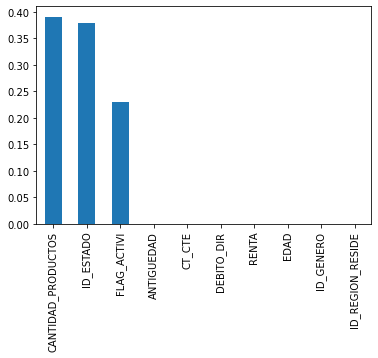

In [66]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()